## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

In [29]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
dados = pd.read_excel("/content/drive/MyDrive/The Boston house-price data.xlsx")

dados.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2310.0,0,0.538,65750,65.2,40900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7070.0,0,0.469,64210,78.9,49671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7070.0,0,0.469,71850,61.1,49671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2180.0,0,0.458,69980,45.8,60622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2180.0,0,0.458,71470,54.2,60622,3,222.0,18.7,396.90,5.33,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [32]:
X = dados.iloc[:,0:-1]
y = dados["MEDV"]

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, train_size=0.8, random_state=2360873)

In [33]:
arv_1 = DecisionTreeRegressor(max_depth=8)

arv_1.fit(X_treino, y_treino)

DecisionTreeRegressor(max_depth=8)

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [ ]:
path = arv_1.cost_complexity_pruning_path(X_treino, y_treino)

path

Text(0, 0.5, 'Impureza total das folhas')

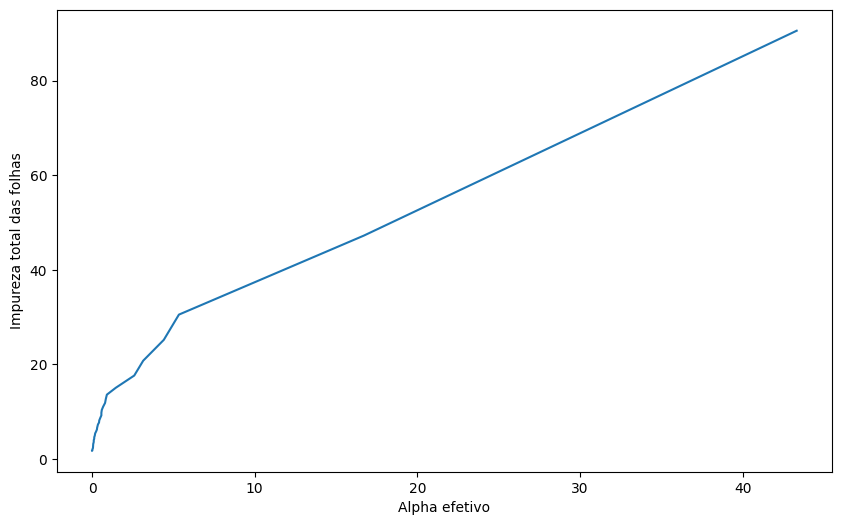

In [35]:
ccp_alphas, impurities = path.ccp_alphas, path.impurities

plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, impurities)
plt.xlabel("Alpha efetivo")
plt.ylabel("Impureza total das folhas")

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [36]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeRegressor(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_treino, y_treino)
    clfs.append(clf)

### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [37]:
train_scores = [mean_squared_error(y_treino, clf.predict(X_treino)) for clf in clfs]
test_scores = [mean_squared_error(y_teste, clf.predict(X_teste)) for clf in clfs]

### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

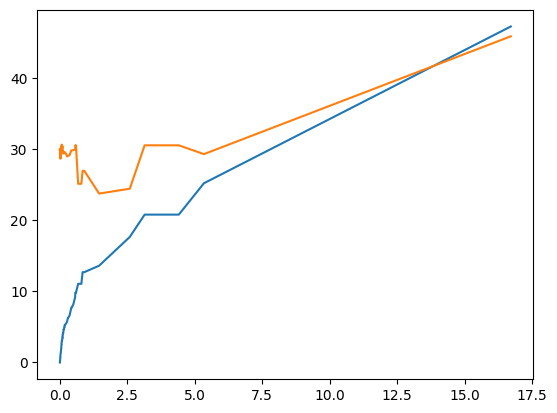

In [38]:

fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], train_scores[:-1])
ax.plot(ccp_alphas[:-1], test_scores[:-1])

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [41]:
arv_final = DecisionTreeRegressor(random_state=0, ccp_alpha=1.2)
arv_final.fit(X_treino, y_treino)

arv_final.score(X_teste, y_teste)

0.6039480982952138

### 7. Visualize esta árvore.

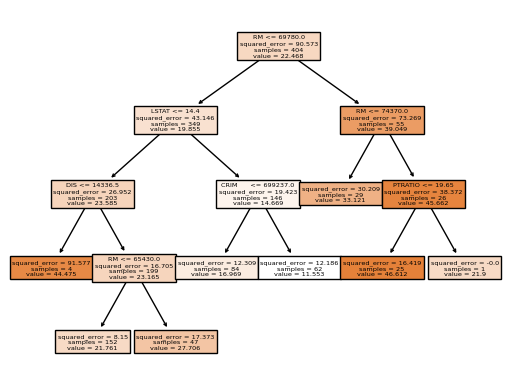

In [42]:
tp =tree.plot_tree(arv_final, feature_names=X.columns, filled=True)